# PROJECT : TCAS Data Analysis & Model Developing using *******

### GROUP : 
#### 1. Arunwat Moonbung | 6131501066
#### 2. Natthida Patlee | 6131501016
#### 3. Piya Jairat | 6131501035
#### 4. Wirakarn Keawkanya | 6131501054


## IMPORT PYTHON LIBRALIES & FILES

In [432]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'tahoma'
import numpy as np

### IMPORT tcas.xlsx file

In [433]:
tcas_original_dataset = pd.read_excel('tcas.xlsx')

## Exploratory Data Analysis & Data preprocessing & Feature Engineering

## Basic Exploration 
### Number of Row x Columns, data types and statistic
#### 36401 Rows, 79 Columns

In [434]:
# dtypes display maximum 80 columns
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)
display("Number of Row x Columns of Original tcas.xlsx", tcas_original_dataset.shape)
display("79 Columns and their data types",tcas_original_dataset.dtypes)

'Number of Row x Columns of Original tcas.xlsx'

(36401, 79)

'79 Columns and their data types'

AcademicYear             int64
AcademicSemester         int64
PrefixName              object
Sex                     object
FacultyID                int64
FacultyName             object
DepartmentCode           int64
DepartmentName          object
MajorName               object
EntryTypeID              int64
EntryTypeName           object
EntryGroupID             int64
EntryGroupName          object
TCAS                     int64
LevelID                  int64
LevelName               object
LevelNameEng            object
ApplicationDate         object
EntryGPA               float64
HomeRegion              object
StudentTH                int64
StudentType             object
Country                 object
SchoolName              object
SchoolProvince          object
ProvinceNameEng         object
SchoolRegion            object
SchoolRegionName        object
SchoolRegionNameEng     object
NationName              object
ReligionName            object
GPAX                   float64
GPA_Eng 

In [435]:
display("Statistic of numeric features", tcas_original_dataset.describe())
display("Statistic of category features", tcas_original_dataset.describe(include=['object']))

'Statistic of numeric features'

AcademicYear  AcademicSemester     FacultyID  DepartmentCode  \
count  36401.000000           36401.0  36401.000000    36401.000000   
mean    2562.515013               1.0     16.895525     1697.151040   
std        0.499781               0.0      4.945143      490.492786   
min     2562.000000               1.0     10.000000     1005.000000   
25%     2562.000000               1.0     12.000000     1209.000000   
50%     2563.000000               1.0     16.000000     1601.000000   
75%     2563.000000               1.0     22.000000     2201.000000   
max     2563.000000               1.0     25.000000     2503.000000   

        EntryTypeID   EntryGroupID          TCAS  LevelID     EntryGPA  \
count  36401.000000   36401.000000  36401.000000  36401.0  7568.000000   
mean      22.995467  628240.152358      2.733194      3.0     3.101413   
std       12.434400    5002.802707      1.259893      0.0     0.627294   
min       10.000000  623010.000000      1.000000      3.0     0.000000   
25%       11.000000  623041.000000      2.000000      3.0     2.850000   
50%       20.000000  633011.000000      3.000000      3.0     3.190000   
75%       29.000000  633040.000000      4.000000      3.0     3.490000   
max       69.000000  633601.000000      5.000000      3.0     4.000000   

          StudentTH          GPAX       GPA_Eng      GPA_Math       GPA_Sci  \
count  36401.000000  36221.000000  19127.000000  19127.000000  19127.000000   
mean       0.991758      1.714026      3.282577      2.827364      3.005401   
std        0.090409      1.654008      0.565863      0.762181      0.613890   
min        0.000000      0.000000      0.750000      0.450000      0.620000   
25%        1.000000      0.000000      2.930000      2.250000      2.580000   
50%        1.000000      2.460000      3.390000      2.830000      3.040000   
75%        1.000000      3.320000      3.750000      3.480000      3.500000   
max        1.000000      4.000000      4.000000      4.000000      4.000000   

            GPA_Sco            Q1            Q2            Q3            Q4  \
count  19127.000000  19117.000000  19117.000000  19117.000000  19117.000000   
mean       3.457994      0.690433      0.792959      0.621750      0.661192   
std        0.458381      0.462327      0.405196      0.484963      0.473317   
min        0.700000      0.000000      0.000000      0.000000      0.000000   
25%        3.195000      0.000000      1.000000      0.000000      0.000000   
50%        3.550000      1.000000      1.000000      1.000000      1.000000   
75%        3.830000      1.000000      1.000000      1.000000      1.000000   
max        4.000000      1.000000      1.000000      1.000000      1.000000   

                 Q5            Q6            Q7            Q8            Q9  \
count  19117.000000  19117.000000  19117.000000  19117.000000  19117.000000   
mean       0.390333      0.555474      0.086101      0.266621      0.314432   
std        0.487838      0.496926      0.280521      0.442204      0.464301   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      0.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                Q10           Q11           Q12           Q13           Q14  \
count  19117.000000  19117.000000  19117.000000  19117.000000  19117.000000   
mean       0.113930      0.073756      0.315792      0.507820      0.043260   
std        0.317735      0.261381      0.464843      0.499952      0.203447   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      1.000000      0.000000   
75%        

'Statistic of category features'

PrefixName     Sex           FacultyName DepartmentName MajorName  \
count       36401   36401                 36401          36401      4796   
unique          3       2                    14             39         4   
top          MISS  Female  School of Management           Laws   English   
freq        27459   27500                  9544           3694      2386   

           EntryTypeName EntryGroupName  LevelName   LevelNameEng  \
count              36401          36401      36401          36401   
unique                19             57          1              1   
top     DIRECT ADMISSION  รับตรงร่วมกัน  ปริญญาตรี  Undergraduate   
freq               14806          11667      36401          36401   

       ApplicationDate HomeRegion StudentType   Country            SchoolName  \
count            36401      21313       36401     13792                  8439   
unique             311          8           2        20                  1349   
top         04/29/2020      North        THAI  Thailand  เทศบาล 6 นครเชียงราย   
freq              6055       8839       36101     13591                   226   

       SchoolProvince ProvinceNameEng SchoolRegion SchoolRegionName  \
count            8439           19616         8439             8439   
unique            113             124            8                8   
top     กรุงเทพมหานคร      CHIANG RAI            N            เหนือ   
freq             1133            2476         2741             2741   

       SchoolRegionNameEng NationName ReligionName           Status  
count                19595      19628        19276            36401  
unique                   7         32            7                2  
top               Northern        ไทย         พุทธ  Not MFU student  
freq                  8363      19275        17895            27752

### Basic Exploration | Observing Missing Value

In [436]:
display('Missing Value in each Columns')
display(tcas_original_dataset.isnull().sum(axis=0)/len(tcas_original_dataset)*100)

'Missing Value in each Columns'

AcademicYear            0.000000
AcademicSemester        0.000000
PrefixName              0.000000
Sex                     0.000000
FacultyID               0.000000
FacultyName             0.000000
DepartmentCode          0.000000
DepartmentName          0.000000
MajorName              86.824538
EntryTypeID             0.000000
EntryTypeName           0.000000
EntryGroupID            0.000000
EntryGroupName          0.000000
TCAS                    0.000000
LevelID                 0.000000
LevelName               0.000000
LevelNameEng            0.000000
ApplicationDate         0.000000
EntryGPA               79.209362
HomeRegion             41.449411
StudentTH               0.000000
StudentType             0.000000
Country                62.110931
SchoolName             76.816571
SchoolProvince         76.816571
ProvinceNameEng        46.111371
SchoolRegion           76.816571
SchoolRegionName       76.816571
SchoolRegionNameEng    46.169061
NationName             46.078404
ReligionNa

In [437]:
display('Missing Value in each Rows')
display(tcas_original_dataset.isnull().sum(axis=1)/len(tcas_original_dataset.columns)*100)

'Missing Value in each Rows'

0        60.759494
1        60.759494
2        62.025316
3        62.025316
4        63.291139
           ...    
36396     7.594937
36397     7.594937
36398     7.594937
36399     7.594937
36400     7.594937
Length: 36401, dtype: float64

## Data cleansing before Univariate Analysis
### Remove Columns contain too many missing values (>= 50%)

In [438]:
#Display and Check which columns have missing value more than 50%
display('Columns which have missing value more than 50%',tcas_original_dataset.columns[tcas_original_dataset.isnull().sum()/len(tcas_original_dataset)*100 >= 50])


'Columns which have missing value more than 50%'

Index(['MajorName', 'EntryGPA', 'Country', 'SchoolName', 'SchoolProvince',
       'SchoolRegion', 'SchoolRegionName'],
      dtype='object')

In [439]:
# Delete Columns have missing value >= 50%

for i in tcas_original_dataset.columns[tcas_original_dataset.isnull().sum()/len(tcas_original_dataset)*100 >= 50]:
    if i in tcas_original_dataset.columns:
        tcas_original_dataset = tcas_original_dataset.drop(columns=[i])
        print("Execute : Delete Columns ", i)
    else:
        pass

Execute : Delete Columns  MajorName
Execute : Delete Columns  EntryGPA
Execute : Delete Columns  Country
Execute : Delete Columns  SchoolName
Execute : Delete Columns  SchoolProvince
Execute : Delete Columns  SchoolRegion
Execute : Delete Columns  SchoolRegionName


## Univariate Analysis
### Categorical features

In [443]:
tcas_categorical_data = tcas_original_dataset.select_dtypes(include=['object'])
display(tcas_categorical_data.columns)

Index(['PrefixName', 'Sex', 'FacultyName', 'DepartmentName', 'EntryTypeName',
       'EntryGroupName', 'LevelName', 'LevelNameEng', 'ApplicationDate',
       'HomeRegion', 'StudentType', 'ProvinceNameEng', 'SchoolRegionNameEng',
       'NationName', 'ReligionName', 'Status'],
      dtype='object')

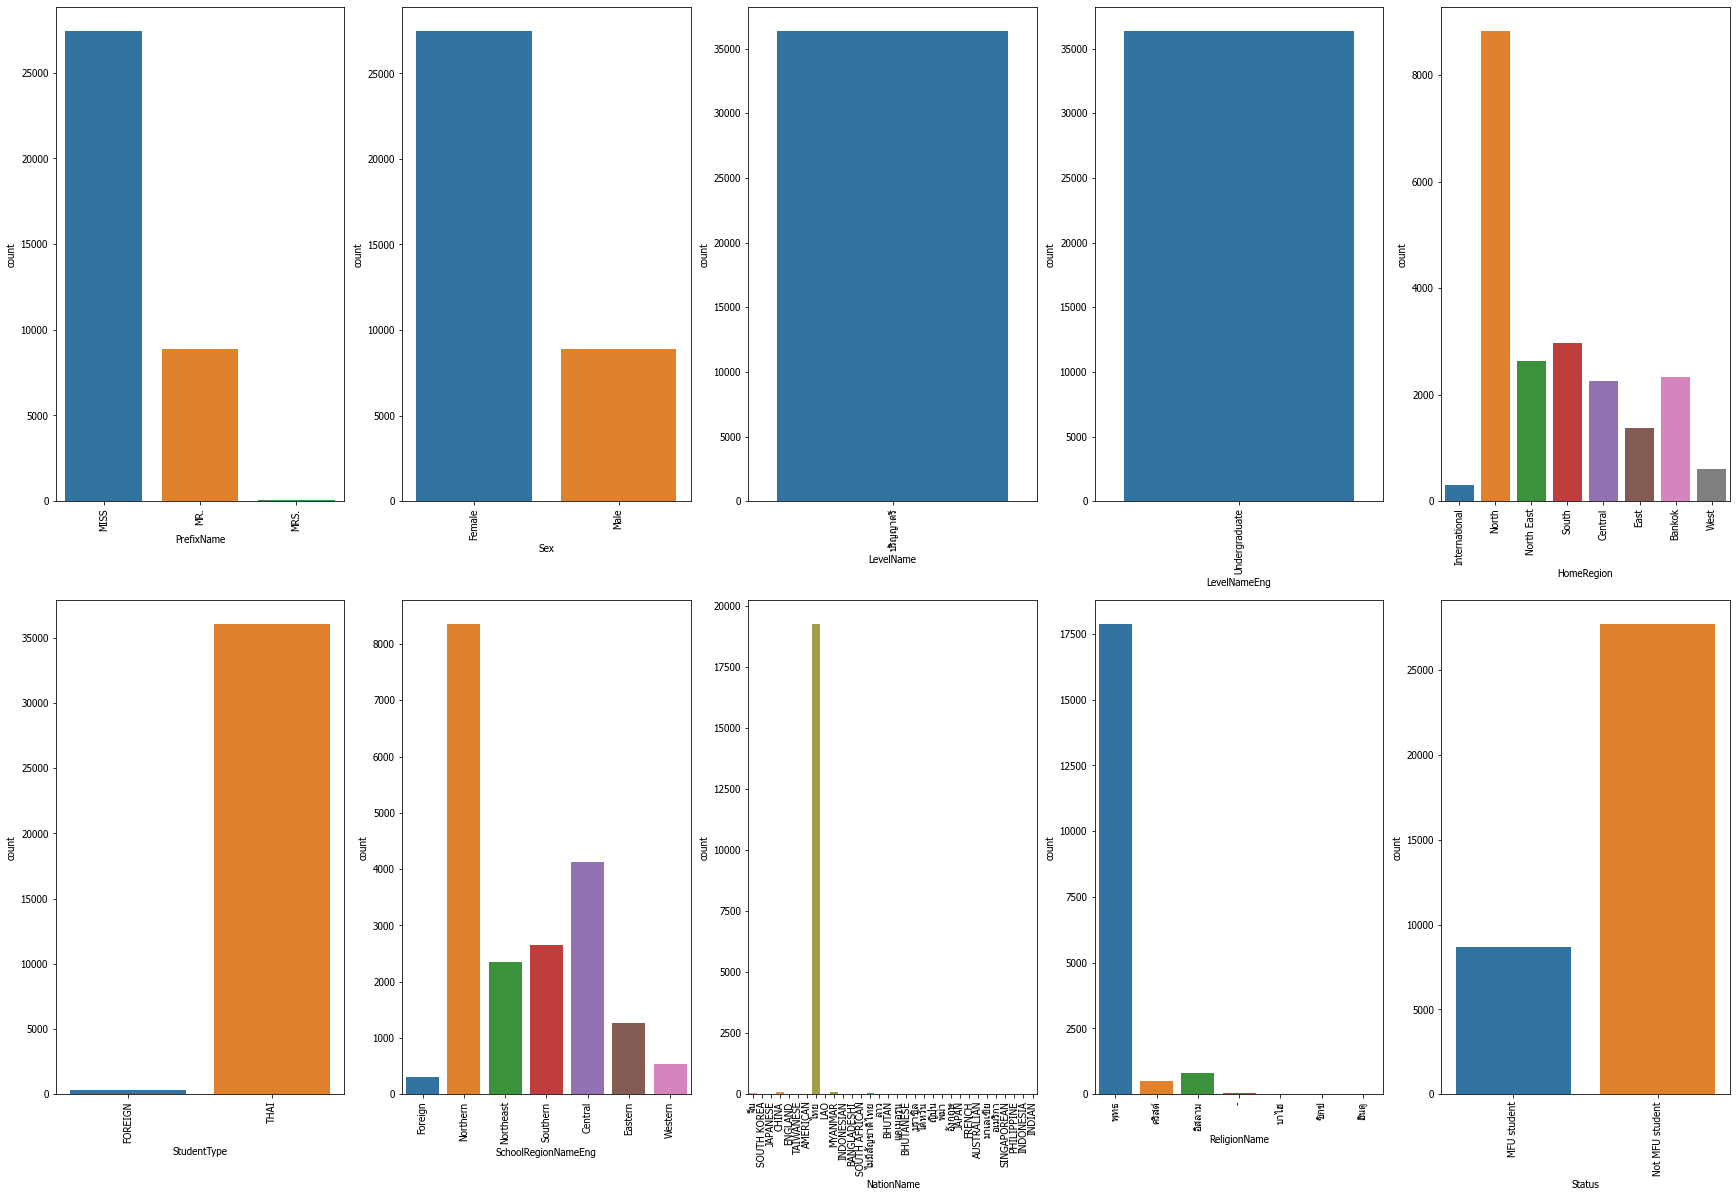

In [444]:
tcas_categorical_group_1 = ['PrefixName','Sex','LevelName','LevelNameEng','HomeRegion','StudentType','SchoolRegionNameEng','NationName','ReligionName','Status']
fig, ax = plt.subplots(2, 5, figsize=(30,20))
for i, subplot in zip(tcas_categorical_group_1, ax.flatten()):
        chart = sb.countplot(tcas_categorical_data[i], ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

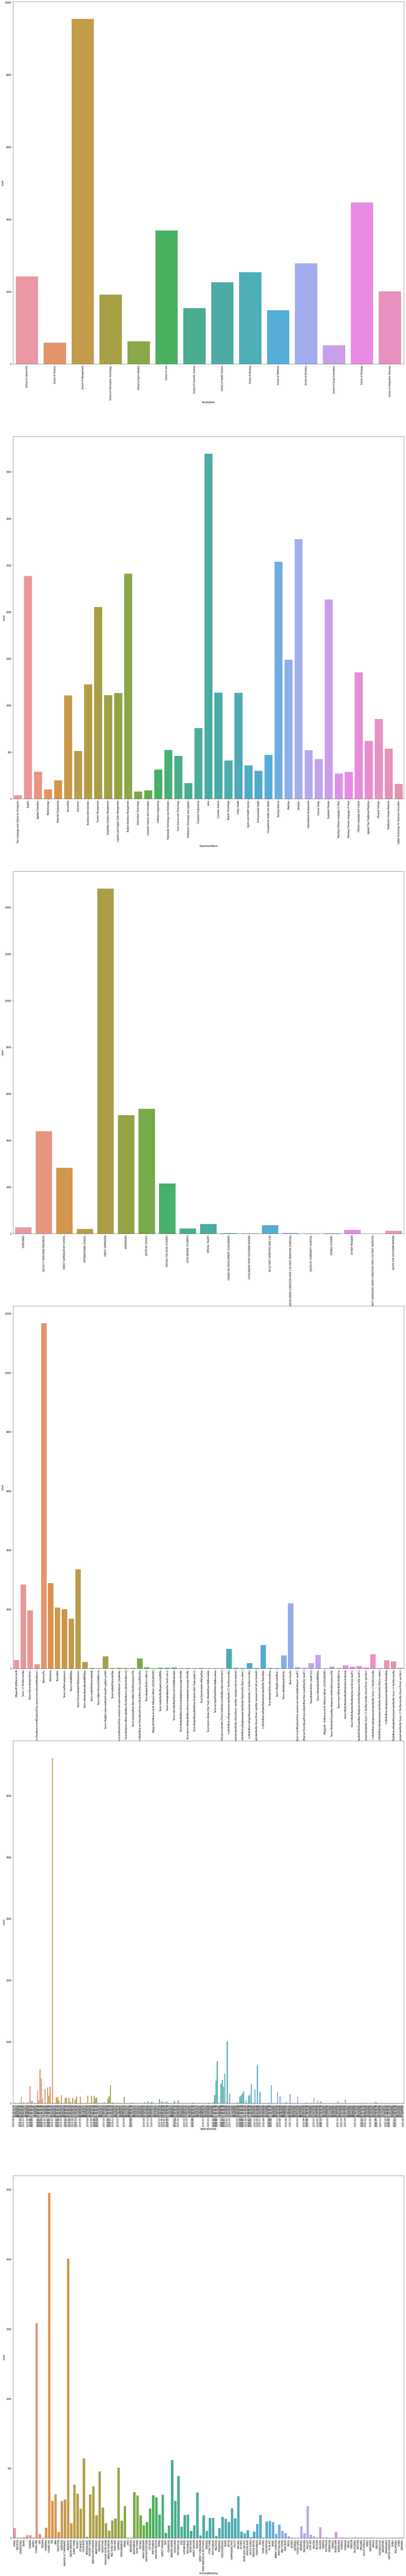

In [445]:
tcas_categorical_group_2 = ['FacultyName','DepartmentName','EntryTypeName','EntryGroupName','ApplicationDate','ProvinceNameEng']
fig, ax = plt.subplots(6, 1, figsize=(30,200))
for i, subplot in zip(tcas_categorical_group_2, ax.flatten()):
        chart = sb.countplot(tcas_categorical_data[i], ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

### Numerical features

In [446]:
tcas_numerical_data = tcas_original_dataset.select_dtypes(include=['number'])
display(tcas_numerical_data.columns)
display(tcas_numerical_data.shape)

Index(['AcademicYear', 'AcademicSemester', 'FacultyID', 'DepartmentCode',
       'EntryTypeID', 'EntryGroupID', 'TCAS', 'LevelID', 'StudentTH', 'GPAX',
       'GPA_Eng', 'GPA_Math', 'GPA_Sci', 'GPA_Sco', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
       'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25',
       'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35',
       'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42'],
      dtype='object')

(36401, 56)

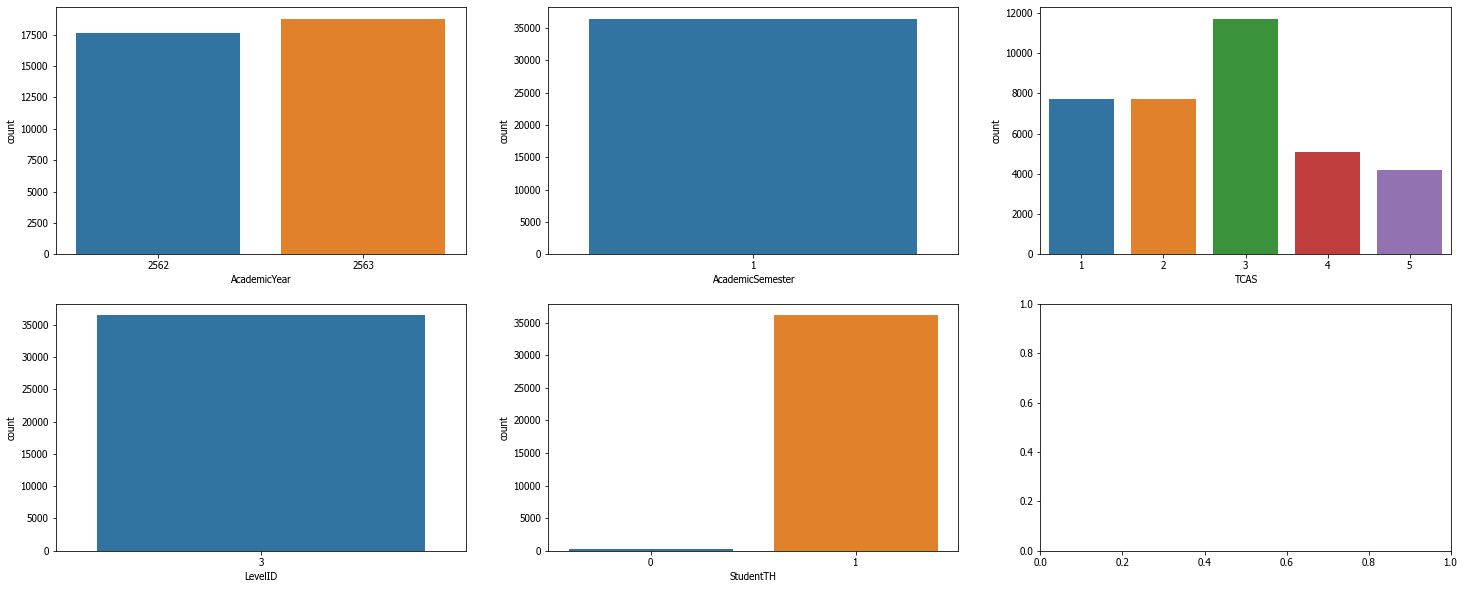

In [447]:
tcas_numerical_group_1 = ['AcademicYear','AcademicSemester','TCAS','LevelID','StudentTH']
fig, ax = plt.subplots(2, 3, figsize=(25,10))
for i, subplot in zip(tcas_numerical_group_1, ax.flatten()):
        chart = sb.countplot(tcas_numerical_data[i], ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

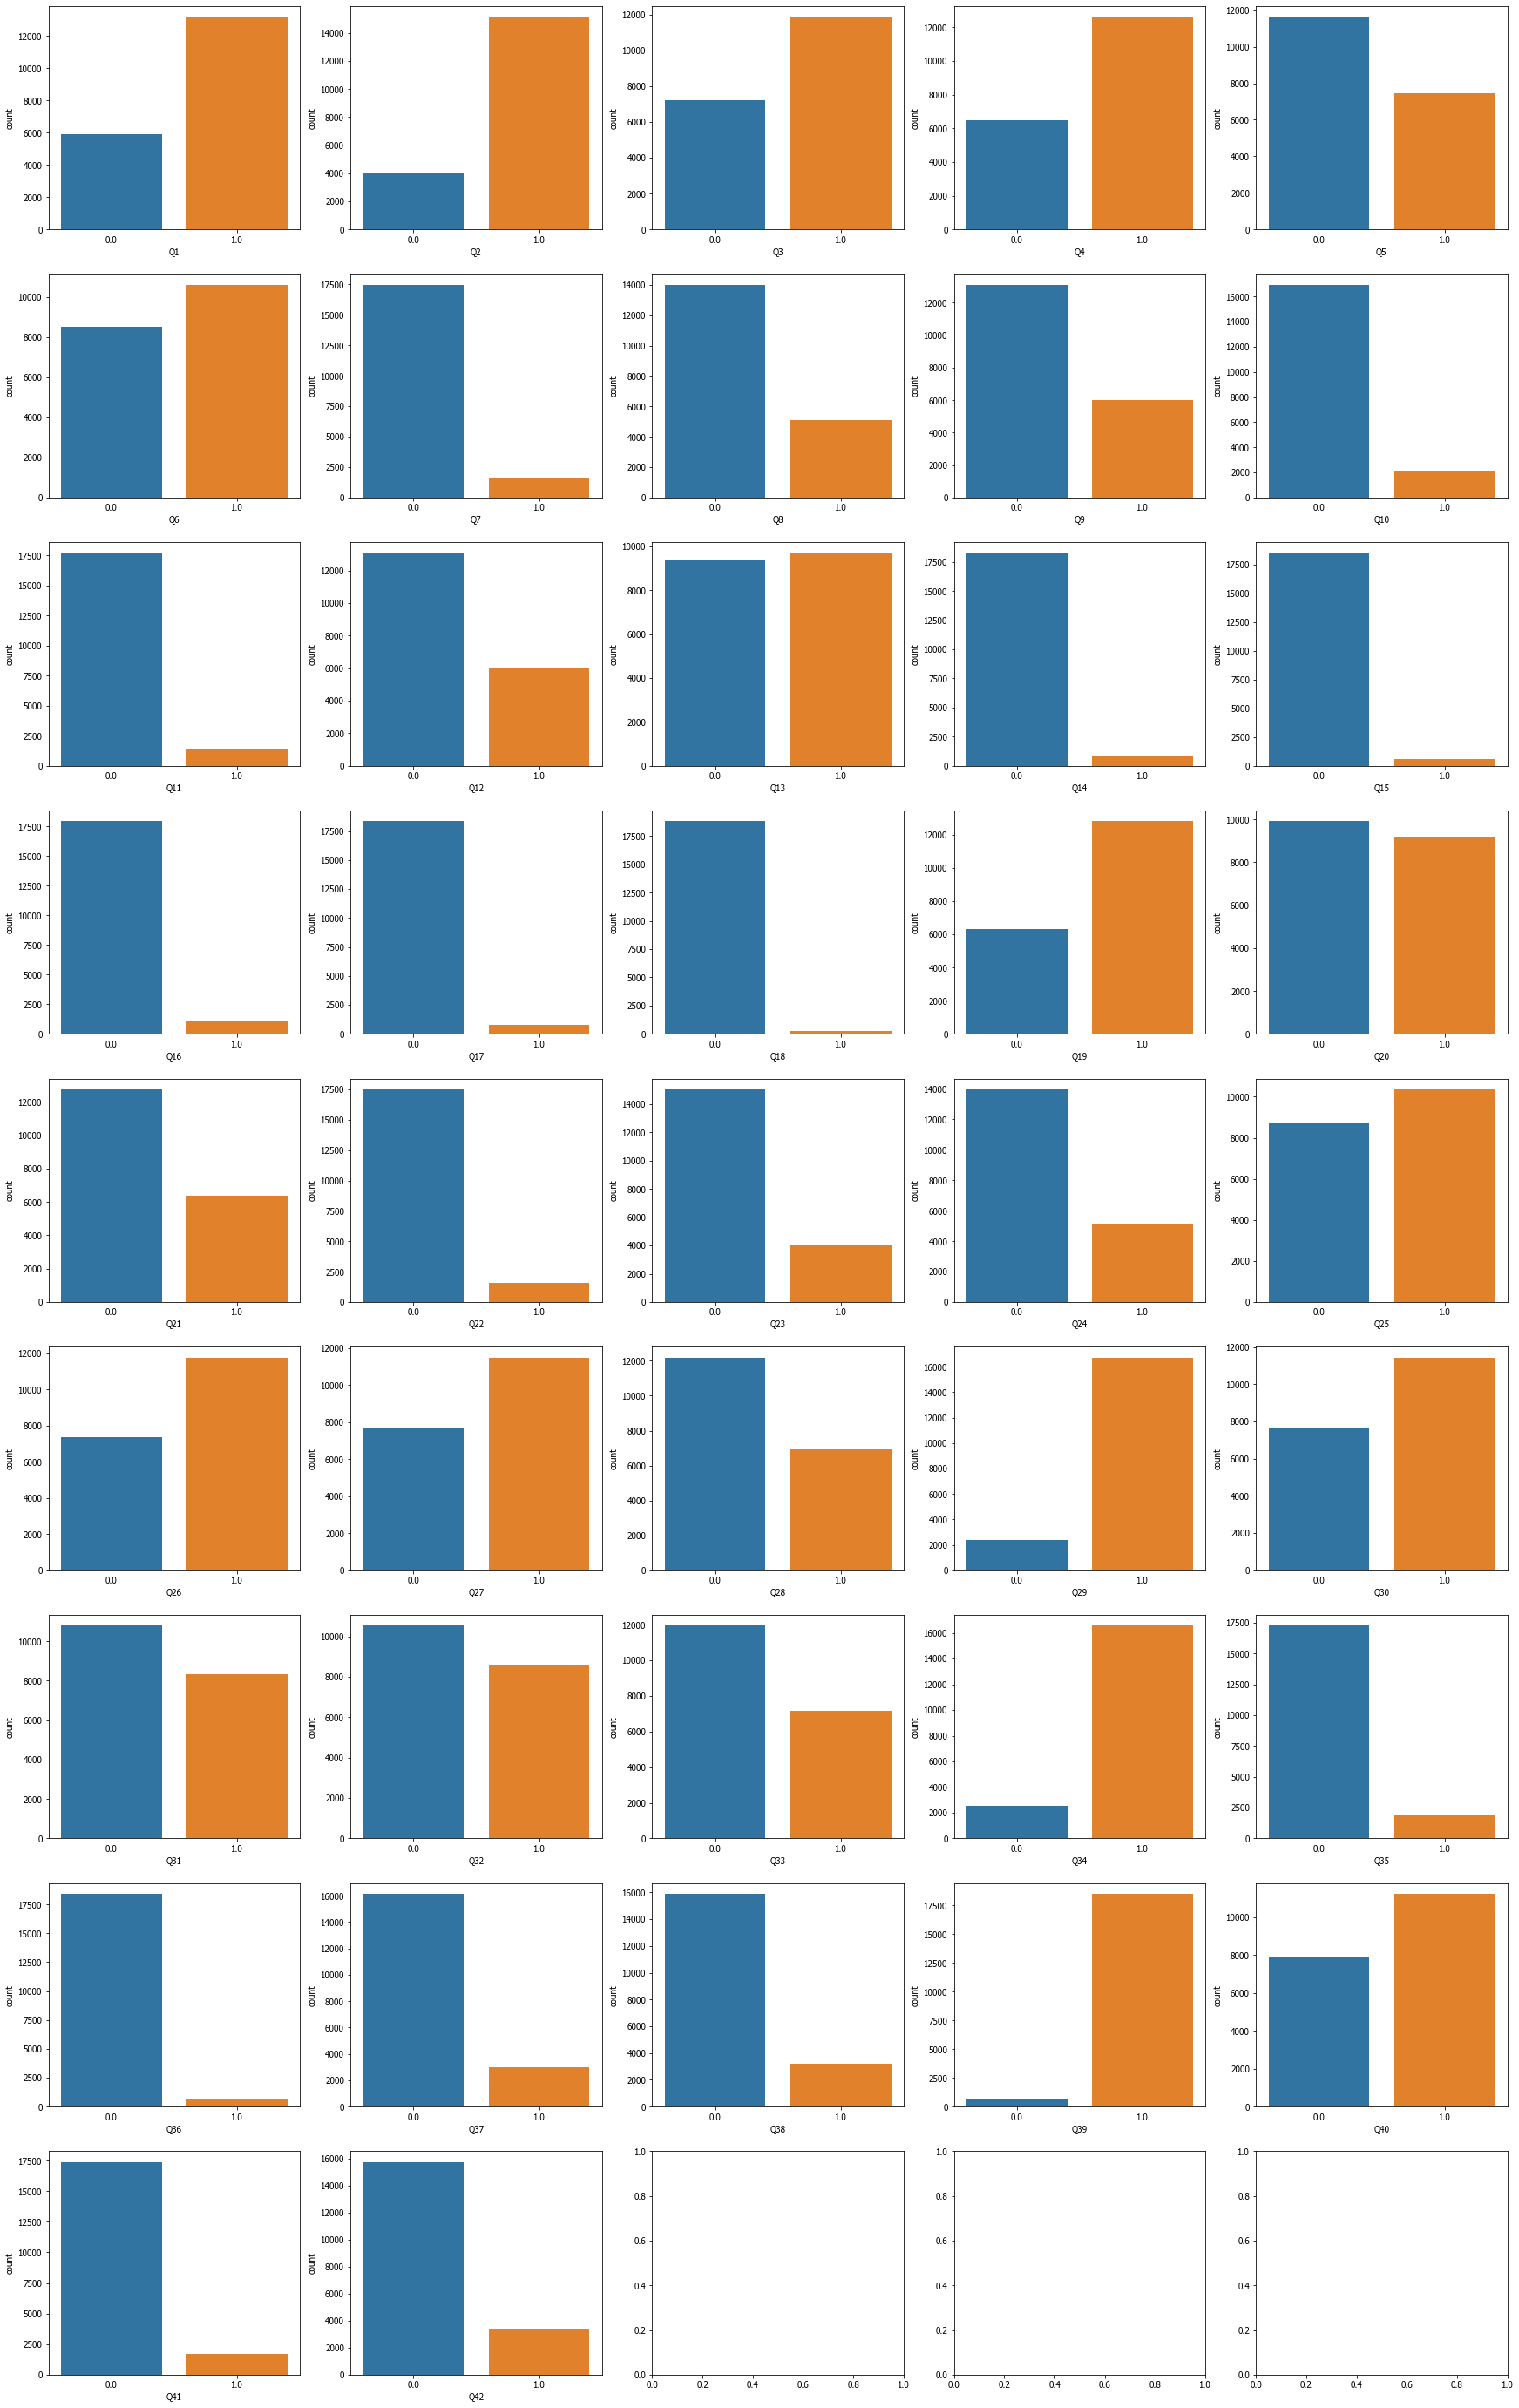

In [448]:
tcas_numerical_group_2 = ['Q1','Q2','Q3','Q4','Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15','Q16', 'Q17', 'Q18', 'Q19', 'Q20','Q21','Q22','Q23', 'Q24', 'Q25','Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35','Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42']
fig, ax = plt.subplots(9, 5, figsize=(30,50))
for i, subplot in zip(tcas_numerical_group_2, ax.flatten()):
        chart = sb.countplot(tcas_numerical_data[i], ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

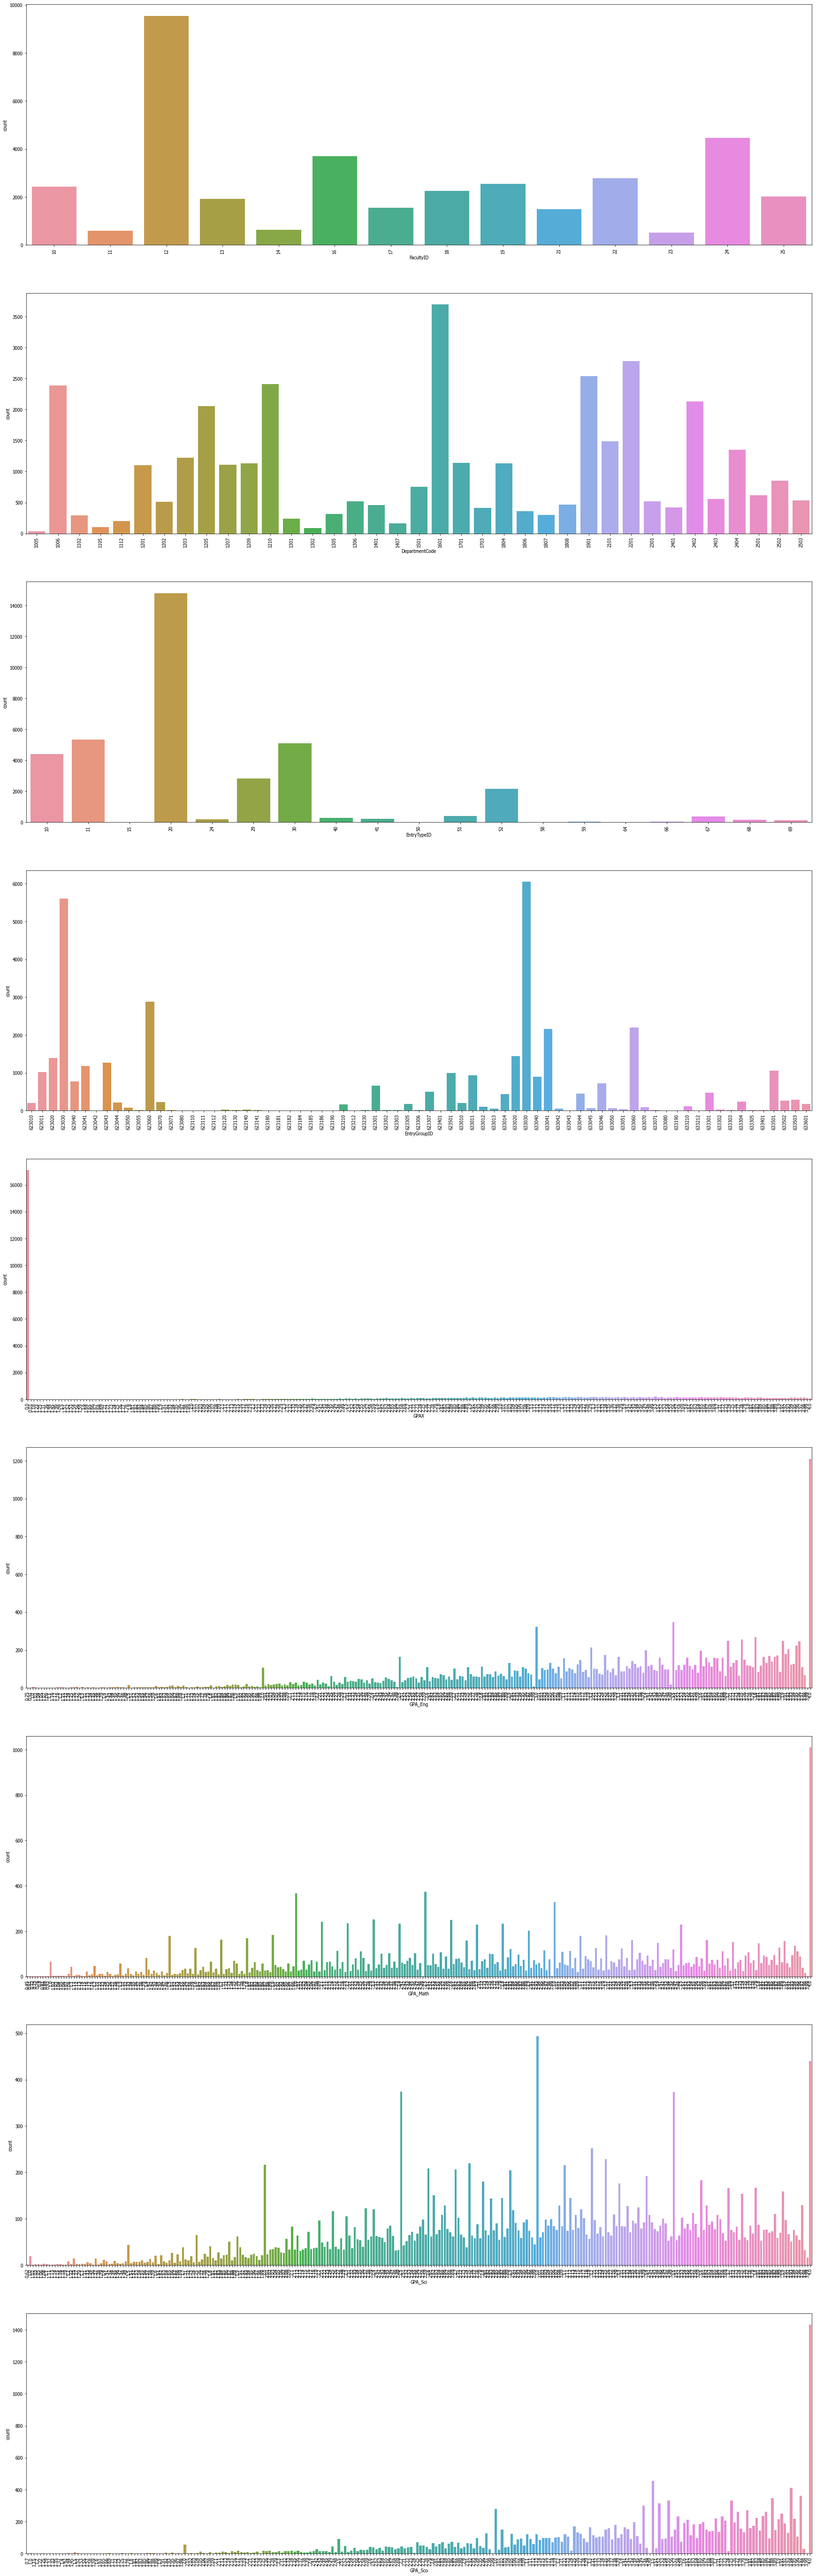

In [449]:
tcas_numerical_group_3 = ['FacultyID','DepartmentCode','EntryTypeID','EntryGroupID','GPAX','GPA_Eng','GPA_Math','GPA_Sci','GPA_Sco']
fig, ax = plt.subplots(9, 1, figsize=(30,100))
for i, subplot in zip(tcas_numerical_group_3, ax.flatten()):
        chart = sb.countplot(tcas_numerical_data[i], ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

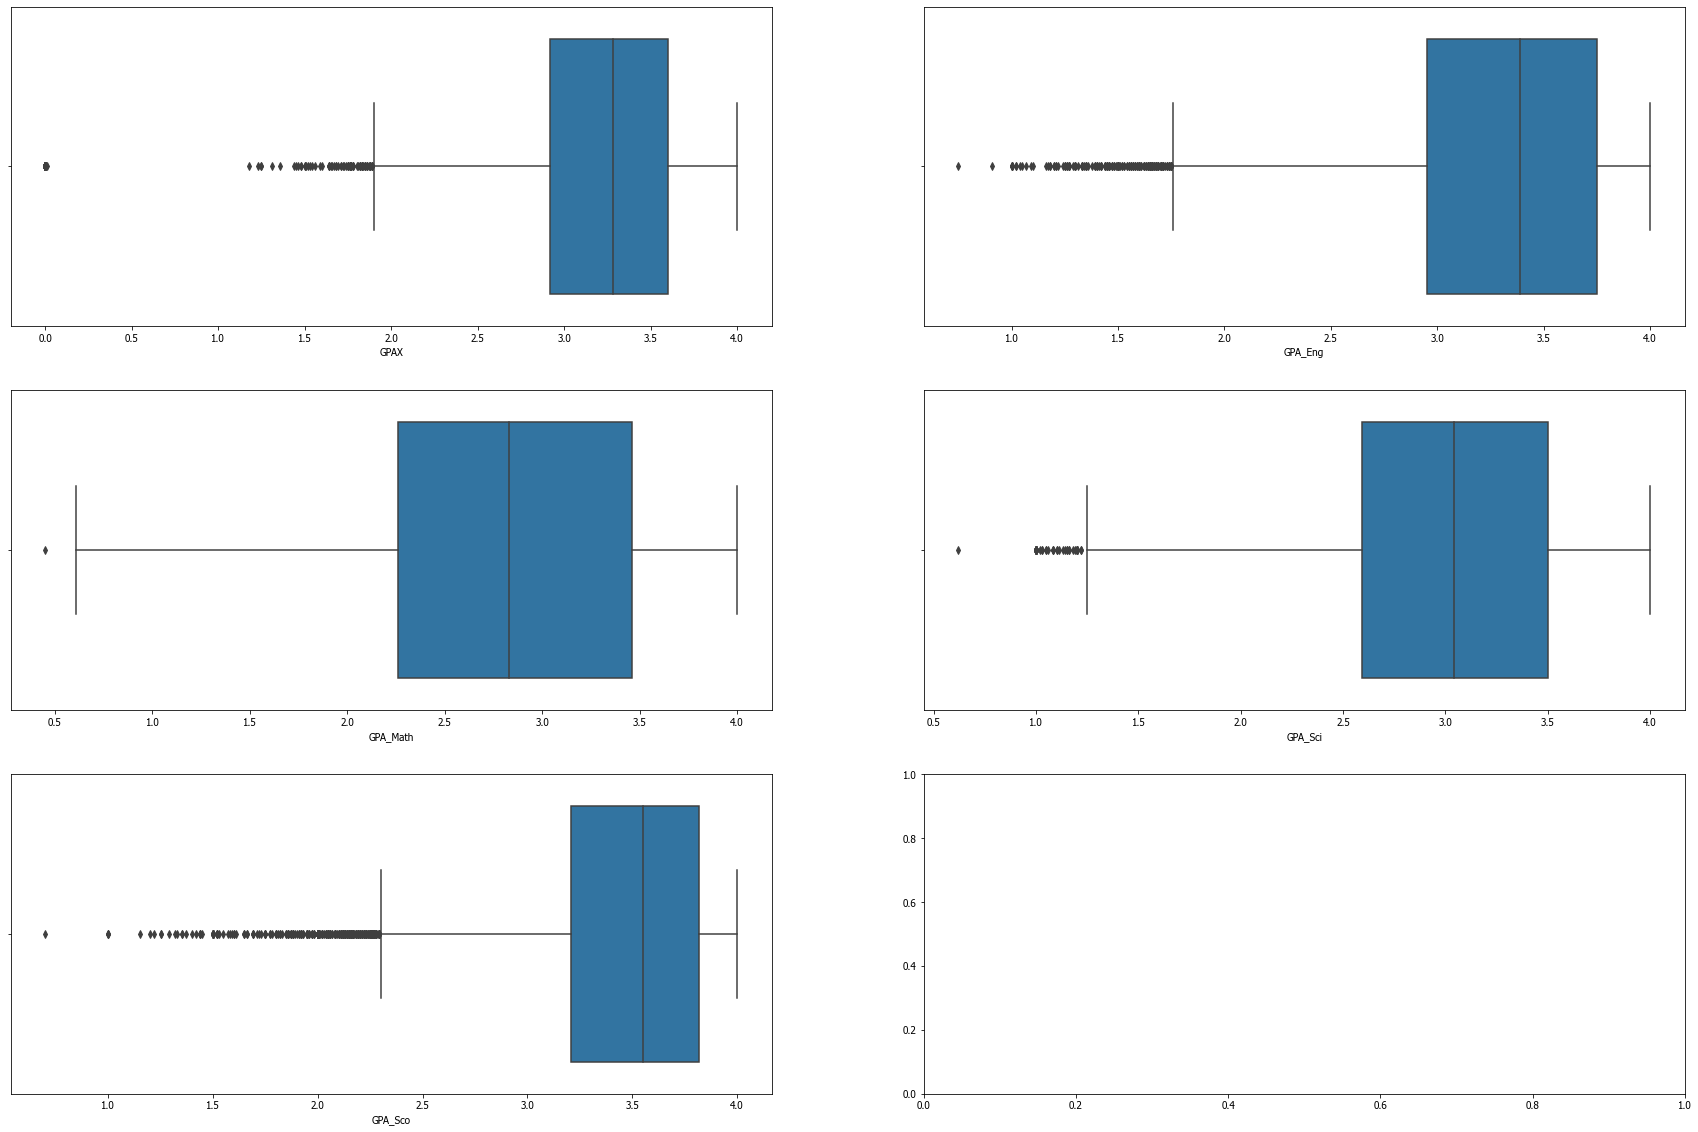

In [476]:
tcas_numerical_group_4 = ['GPAX','GPA_Eng','GPA_Math','GPA_Sci','GPA_Sco']
fig, ax = plt.subplots(3, 2, figsize=(30,20))
for i, subplot in zip(tcas_numerical_group_4, ax.flatten()):
        boxplot = sb.boxplot(tcas_numerical_data[i], ax=subplot)

## Data cleansing before Bivariate Analysis
### Remove Scope and Duplicate meaning and Irrevant of Columns and Row
### Scope of analysis Columns
#### 1. LevelName
#### 2. LevelNameEng
#### 3. AcademicSemester
#### 4. LevelID

In [451]:
#Remove scope of analysis Columns
tcas_scopeofanalysis_columns = ['LevelName','LevelNameEng','AcademicSemester','LevelID']
for i in tcas_scopeofanalysis_columns:
    if i in tcas_original_dataset.columns:
        tcas_original_dataset = tcas_original_dataset.drop(columns=[i])
        print("Execute : Delete Columns ", i)
    else:
        pass
    
display(tcas_original_dataset.shape)

Execute : Delete Columns  LevelName
Execute : Delete Columns  LevelNameEng
Execute : Delete Columns  AcademicSemester
Execute : Delete Columns  LevelID


(36401, 68)

### Duplicate Meaning Columns (Columns which has the same meaning but represented in differnt format or language)
#### Note: Choosing winning columns by observing the less percentage of missing values and appropriate format for later used
### 1. StudentTH vs StudentType
#### Both can tell us the same detail wheter those student are Thai or Foreign (0 = Foreign, 1 = Thai)
#### Winner : StudentTH is chosen because it is in an appropriate format (Boolean).
### 2. FacultyID vs FacultyName
#### Winner : Faculty Name, Better information when doing One-Hot Encoding Process.
### 3. DepartmentCode vs DepartmentName
#### Winner : DepartmentName, Better information when doing One-Hot Encoding Process.
### 4. EntryTypeID vs EntryTypeName
#### Winner : EntryTypeName, Better information when doing One-Hot Encoding Process.
### 5. EntryGroupID vs EntryGroupName
#### Winner : EntryGroupName, Better information when doing One-Hot Encoding Process.
### 6. PrefixName vs Sex
#### Winner : PrefixName, Both can tell the Sex of Student, However, PrefixName can also tell the marital status of student
### 7. HomeRegion vs SchoolRegionNameEng vs ProvinceNameEng
#### Winner : HomeRegion, Both can tell where student came from, since School has more missing value than HomeRegion
### 8. EntryTypeName vs EntryGroupName
#### Winner : EntryTypeName, Most of the class in both columns are the same, EntryGroupName seem to be a sub-type of EntryTypeName
### 9. TCAS vs EntryTypeName 
#### Winner : TCAS, TCAS seem to be the main Entry type of Student


In [452]:
#Remove Duplicate Meaning Columns
tcas_duplicatemeaning_columns = ['StudentType','FacultyID','DepartmentCode','EntryTypeID','EntryGroupID','Sex','SchoolRegionNameEng','EntryGroupName','EntryTypeName']
for i in tcas_duplicatemeaning_columns:
    if i in tcas_original_dataset.columns:
        tcas_original_dataset = tcas_original_dataset.drop(columns=[i])
        print("Execute : Delete Columns ", i)
    else:
        pass
    
display(tcas_original_dataset.shape)

Execute : Delete Columns  StudentType
Execute : Delete Columns  FacultyID
Execute : Delete Columns  DepartmentCode
Execute : Delete Columns  EntryTypeID
Execute : Delete Columns  EntryGroupID
Execute : Delete Columns  Sex
Execute : Delete Columns  SchoolRegionNameEng
Execute : Delete Columns  EntryGroupName
Execute : Delete Columns  EntryTypeName


(36401, 59)

### Irrelavant Columns
#### ApplicationDate, This columns only show us when student is apply for the admission. AcademicYear can also tell us.
#### NationName, This is useless data when comparing to similar columns such as StudentType, HomeRegion. Most of the data set student came from Thai there is no point to specify foriegn student
#### ProvinceNameEng, Instead of specify Province name, using a type category by the region is much more learnable for model
#### AcademicYear didn't tell us anything whether student will be MFU or not

In [453]:
#Remove irrelevant Columns
tcas_irrelevant_columns1 = ['ApplicationDate','NationName','ProvinceNameEng','AcademicYear']
for i in tcas_irrelevant_columns1:
    if i in tcas_original_dataset.columns:
        tcas_original_dataset = tcas_original_dataset.drop(columns=[i])
        print("Execute : Delete Columns ", i)
    else:
        pass
    
display(tcas_original_dataset.shape)

Execute : Delete Columns  ApplicationDate
Execute : Delete Columns  NationName
Execute : Delete Columns  ProvinceNameEng
Execute : Delete Columns  AcademicYear


(36401, 55)

In [454]:
#Update Categorical Columns and Numerical Columns
tcas_categorical_data = tcas_original_dataset.select_dtypes(include=['object'])
tcas_numerical_data = tcas_original_dataset.select_dtypes(include=['number'])

display(tcas_original_dataset.columns)

Index(['PrefixName', 'FacultyName', 'DepartmentName', 'TCAS', 'HomeRegion',
       'StudentTH', 'ReligionName', 'GPAX', 'GPA_Eng', 'GPA_Math', 'GPA_Sci',
       'GPA_Sco', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
       'Q41', 'Q42', 'Status'],
      dtype='object')

## Bivariate Analysis
### Count plot between a categorical feature and class

In [455]:
tcas_countplot_group1 = ['PrefixName','HomeRegion','StudentTH','ReligionName','TCAS']
tcas_countplot_group2 = ['FacultyName','DepartmentName','GPAX','GPA_Eng','GPA_Math','GPA_Sci','GPA_Sco']
tcas_countplot_group3 = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10','Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20','Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30','Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40','Q41', 'Q42']

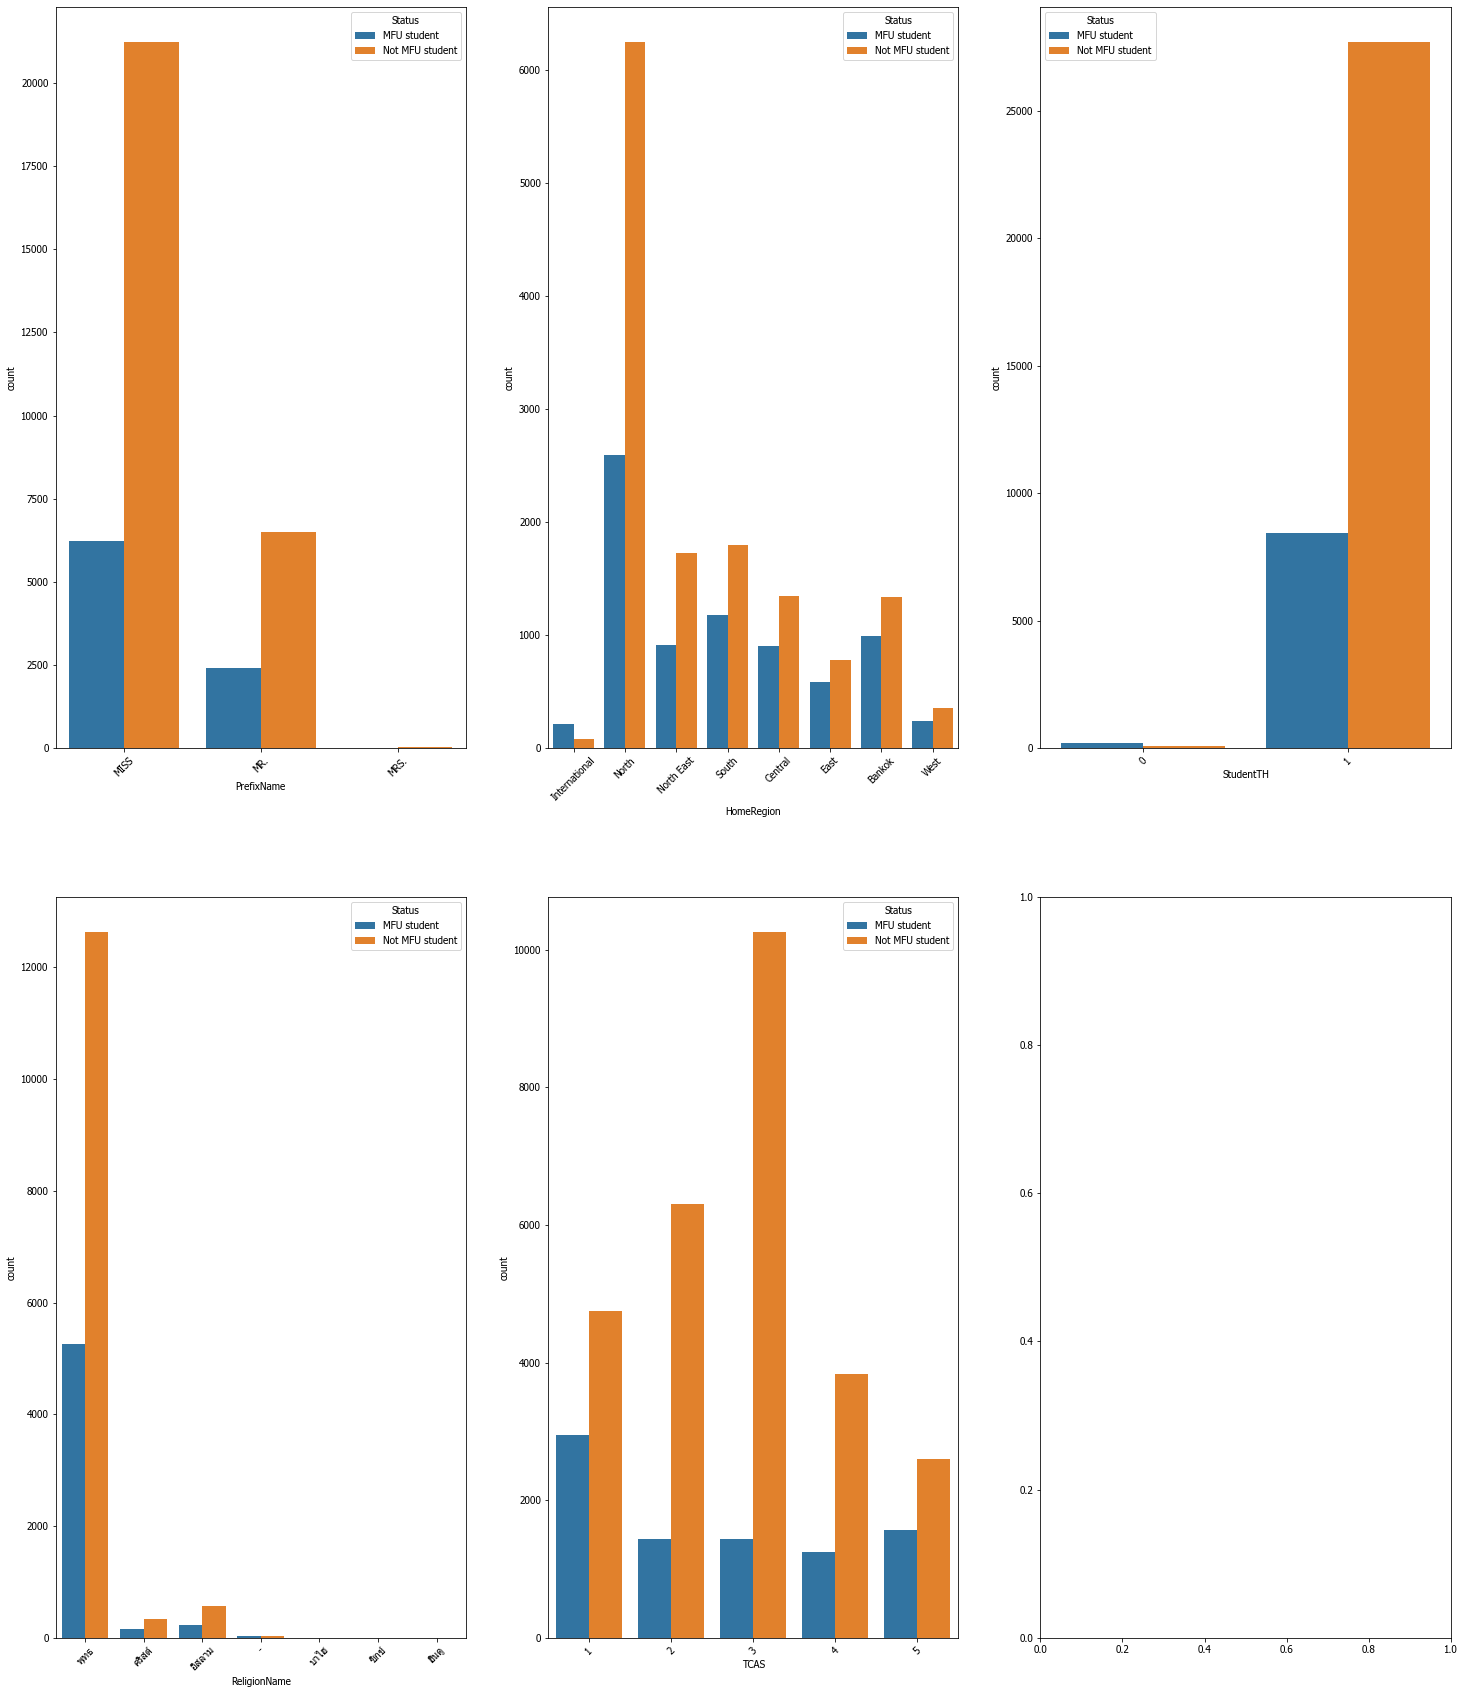

In [456]:
fig, ax = plt.subplots(2, 3, figsize=(25,30))
for i, subplot in zip(tcas_countplot_group1, ax.flatten()):
        chart = sb.countplot(data=tcas_original_dataset, x=i, hue='Status',ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

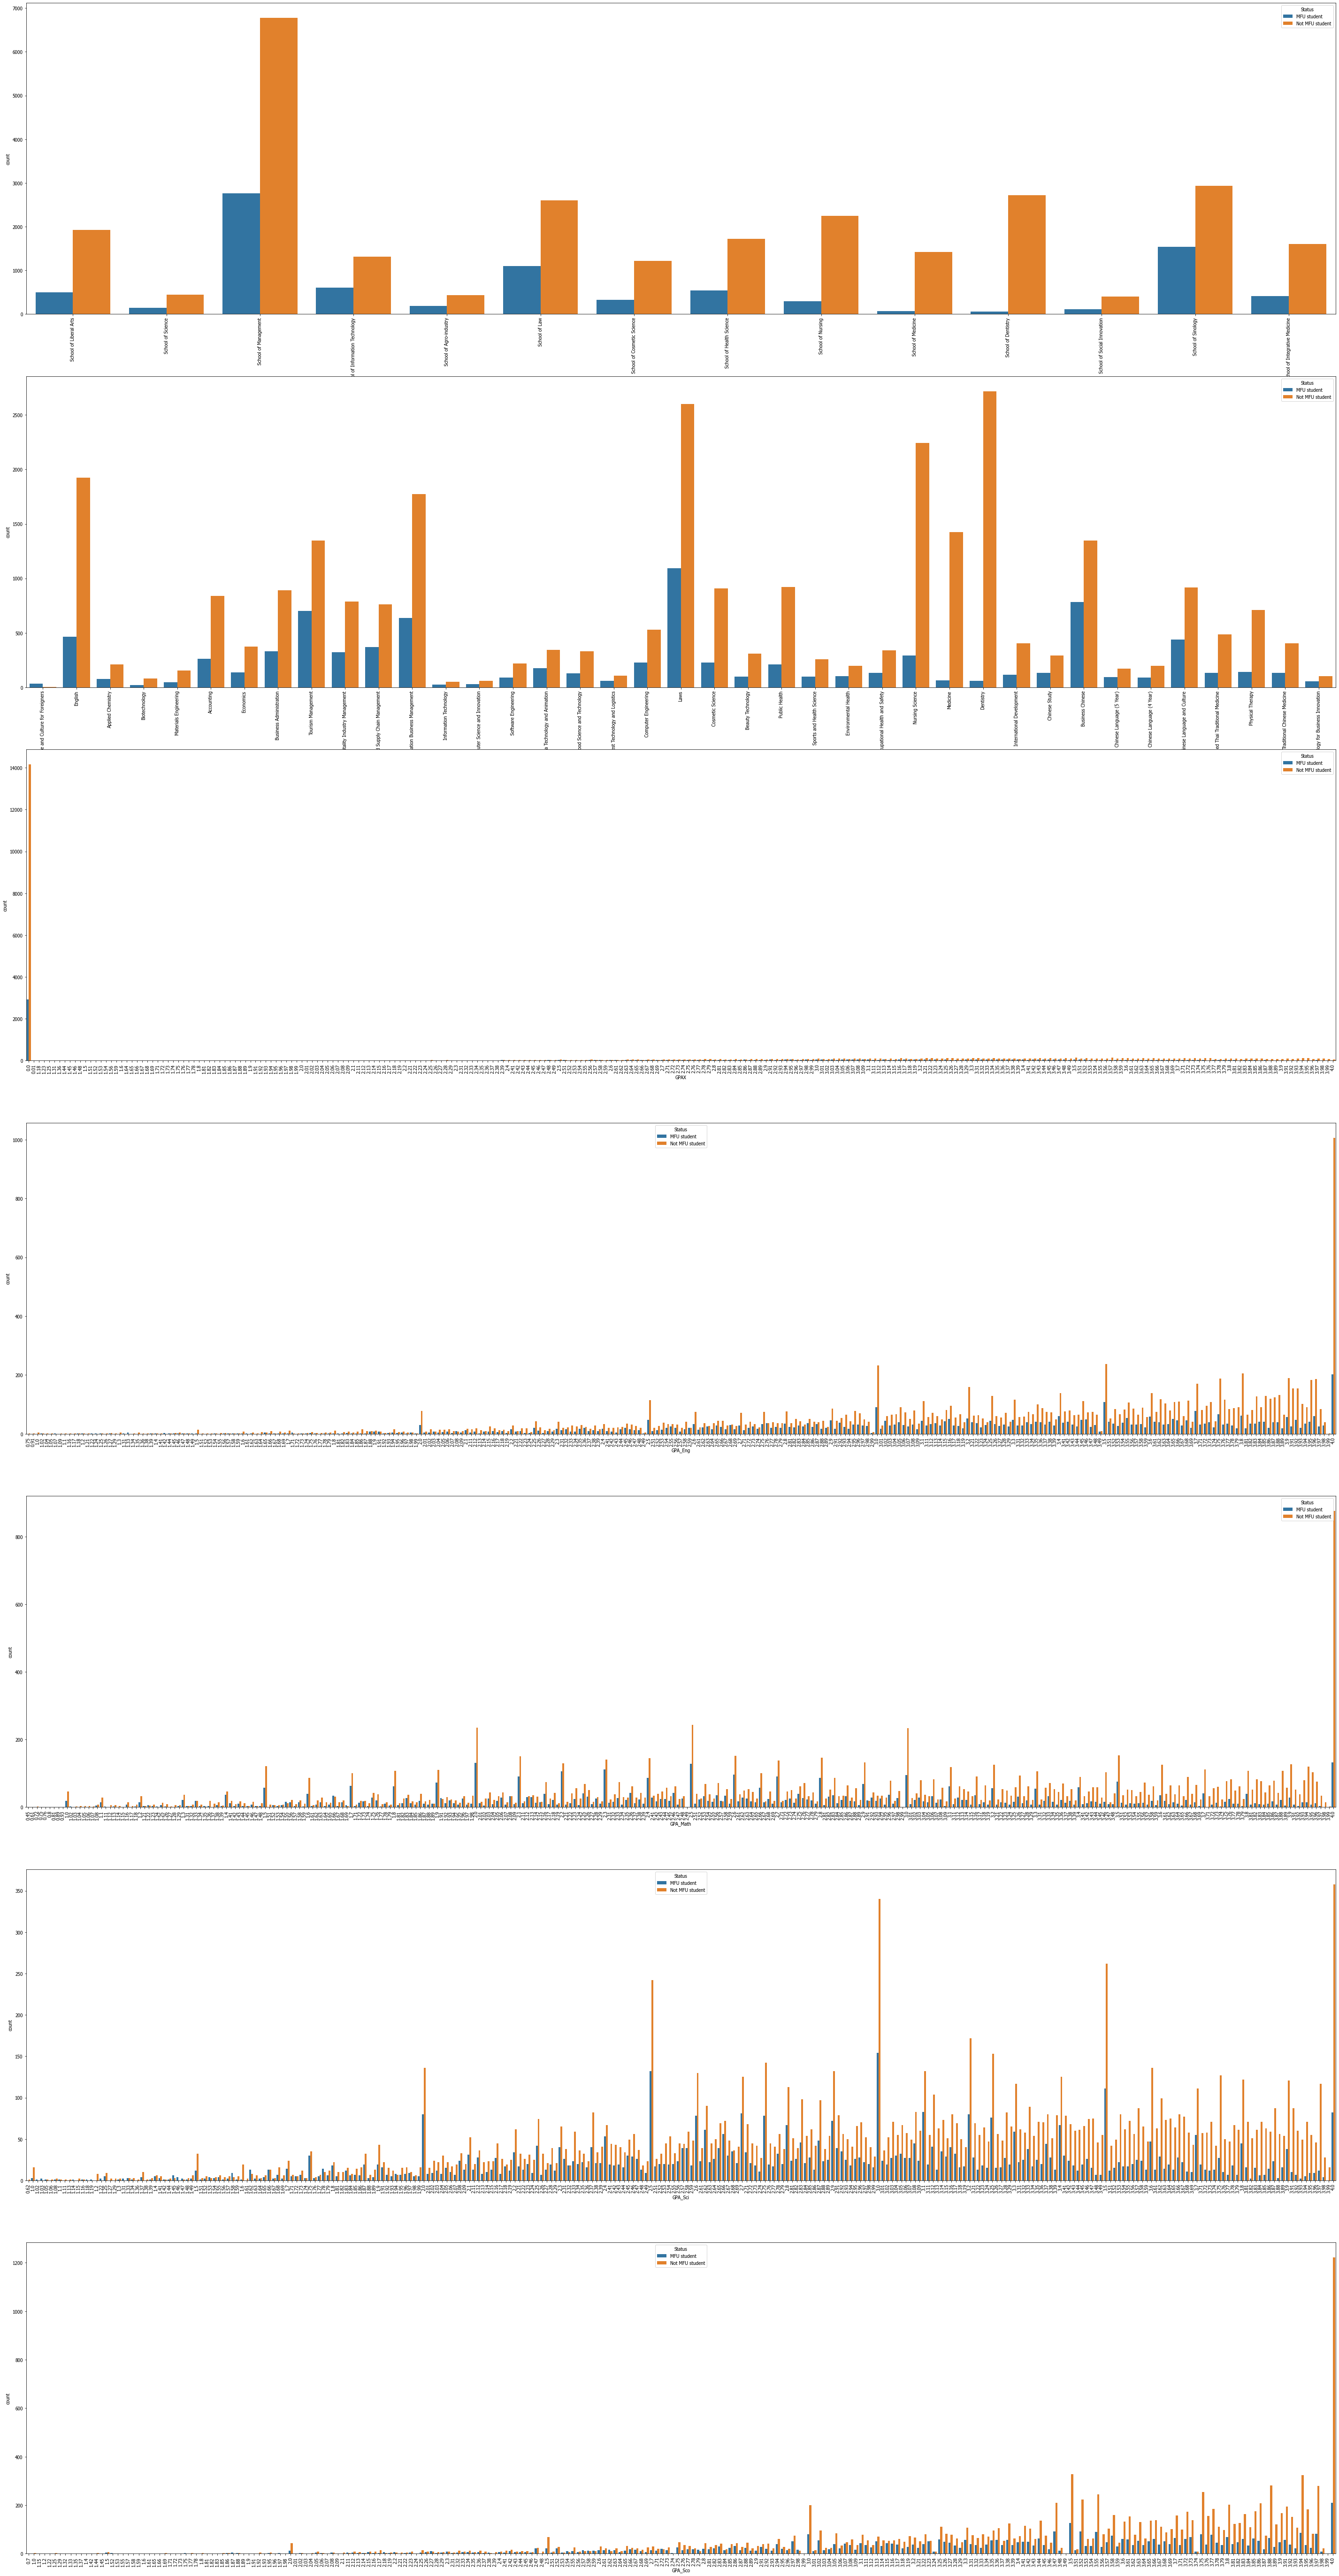

In [457]:
#ต้องปรับ Figsize ให้เหมาะสม แต่ตอนนี้ลดขนาดไปก่อนเพื่อเพิ่มความเร็วในการทำงาน - กราฟบอกอะไรไม่ได้มากเท่าไหร่
fig, ax = plt.subplots(7, 1, figsize=(50,100))
for i, subplot in zip(tcas_countplot_group2, ax.flatten()):
        chart = sb.countplot(data=tcas_original_dataset, x=i, hue='Status',ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

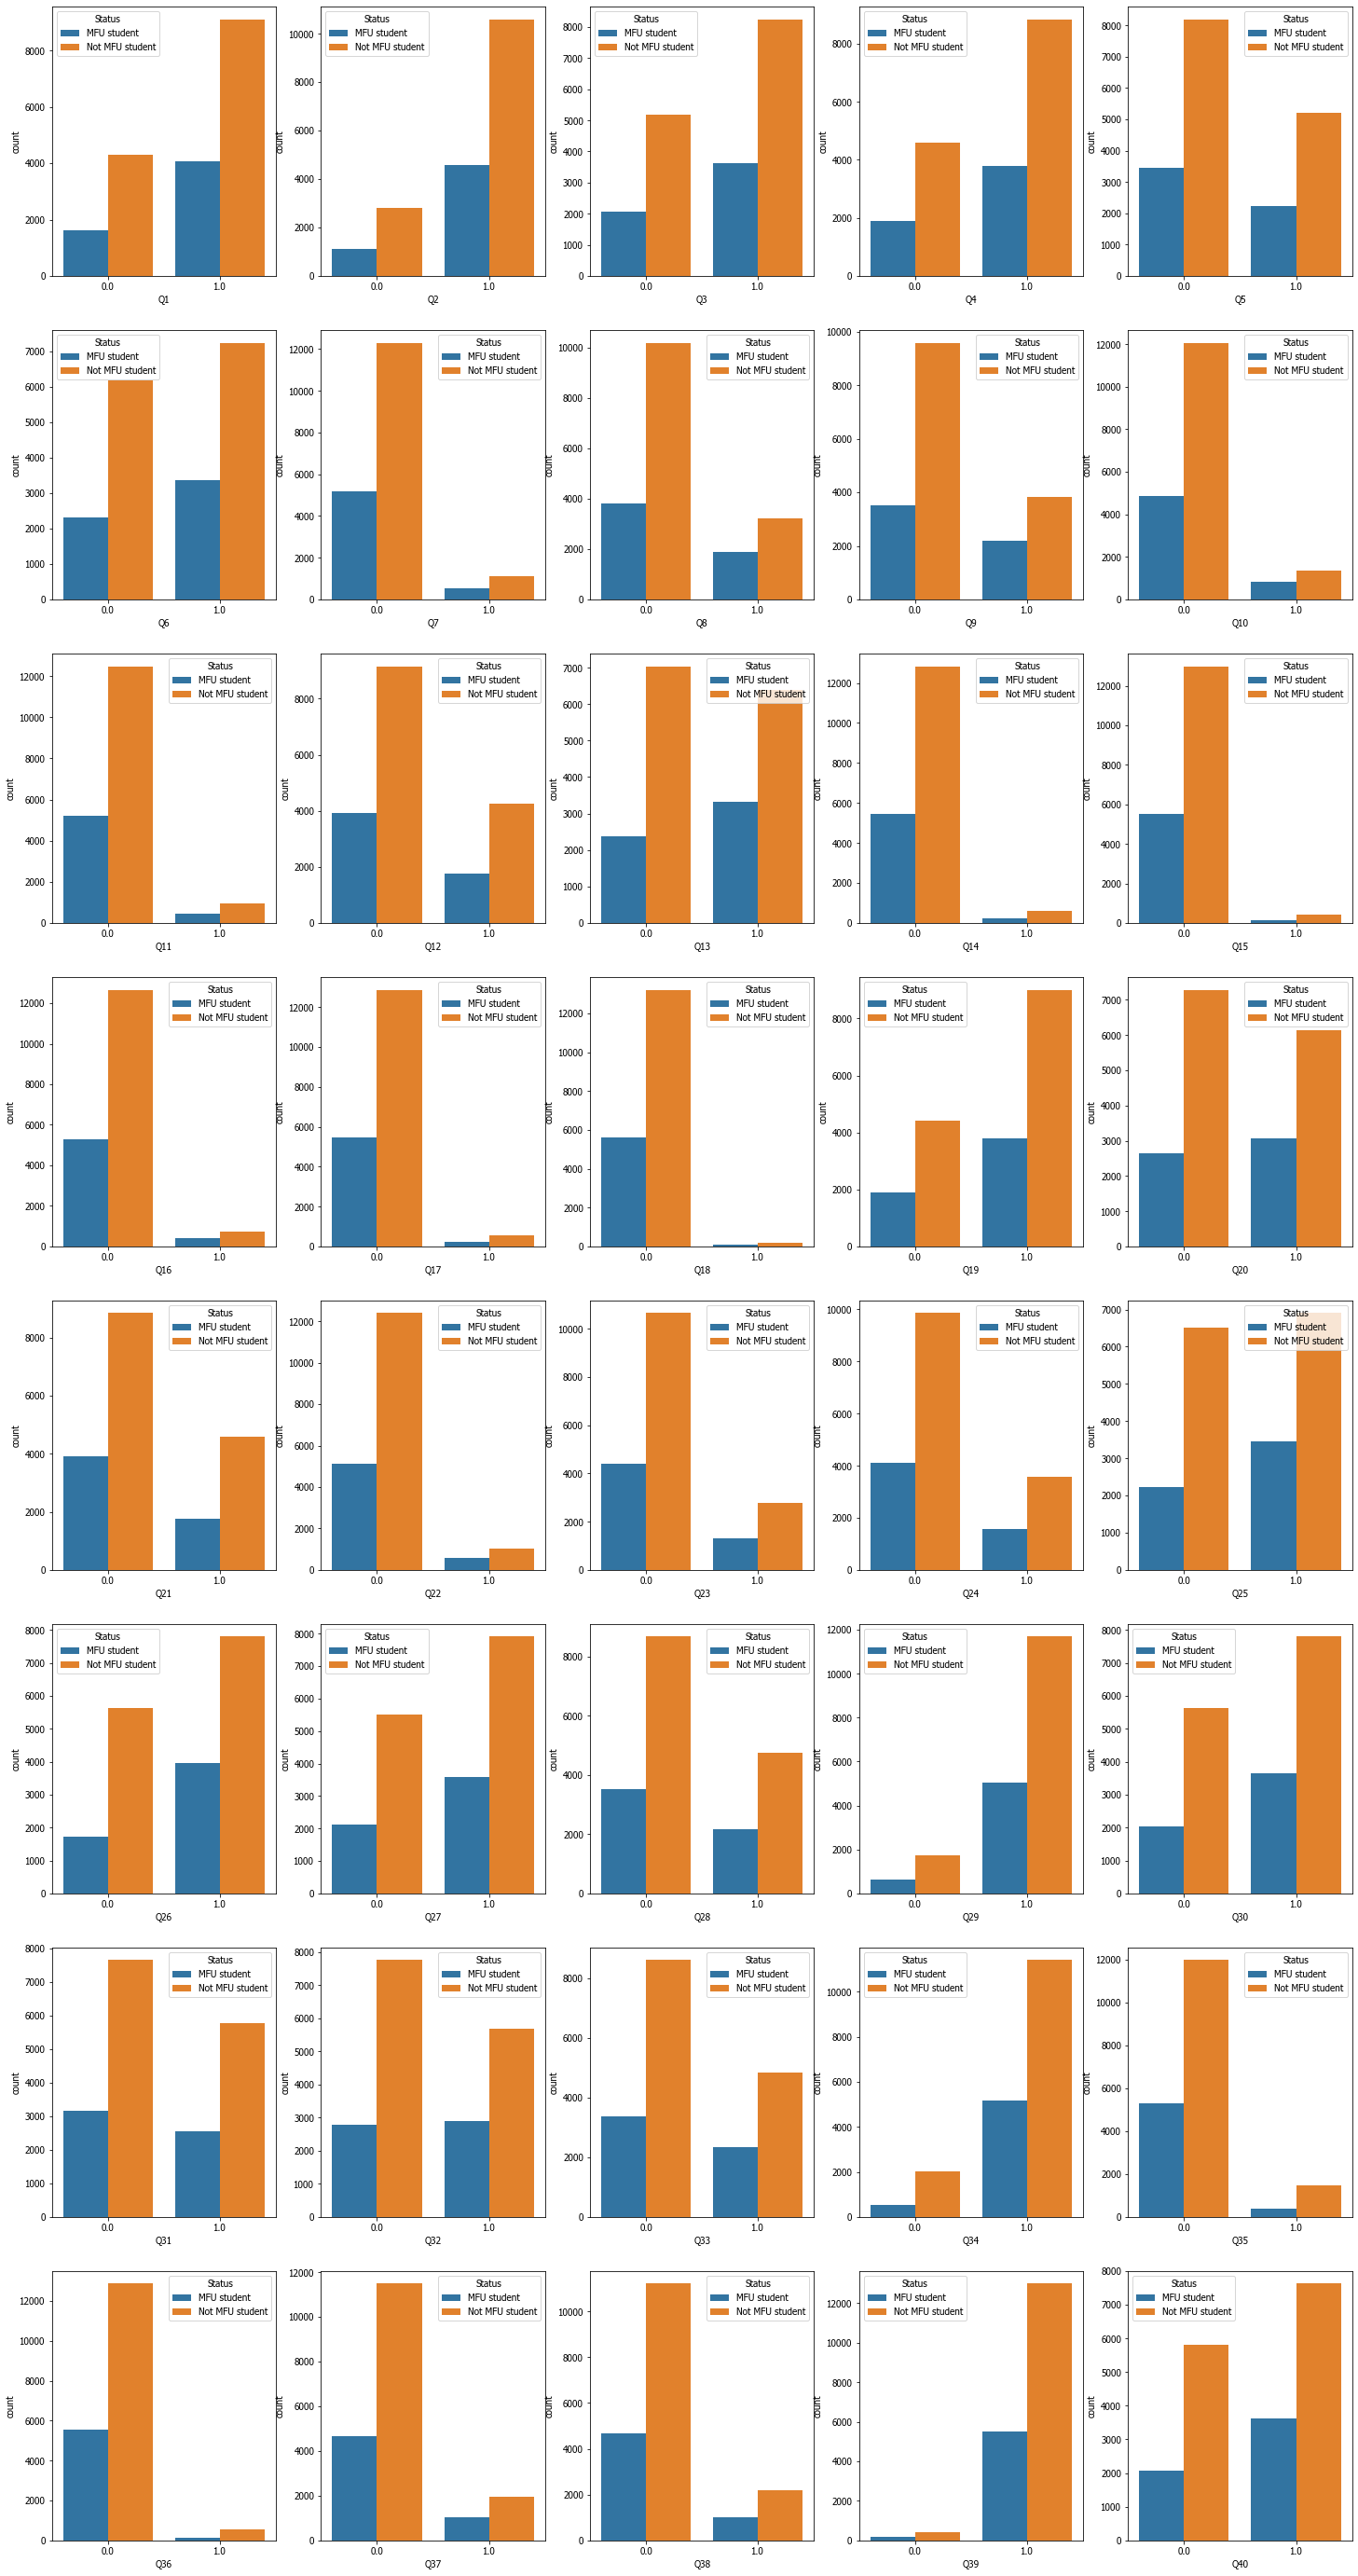

In [458]:
fig, ax = plt.subplots(8, 5, figsize=(25,50))
for i, subplot in zip(tcas_countplot_group3, ax.flatten()):
        chart = sb.countplot(data=tcas_original_dataset, x=i, hue='Status',ax=subplot)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=0)

## Data Cleansing (Fixing)
### Delete duplicates row

In [459]:
# Delete duplicates row
tcas_original_dataset.drop_duplicates(keep=False, inplace=True)
# Row and Columns now
tcas_original_dataset.shape

(19588, 55)

In [460]:
# Missing Value in each Columns so far
display('Missing Value in each Columns')
display(tcas_original_dataset.isnull().sum(axis=0)/len(tcas_original_dataset)*100)

'Missing Value in each Columns'

PrefixName        0.000000
FacultyName       0.000000
DepartmentName    0.000000
TCAS              0.000000
HomeRegion        4.293445
StudentTH         0.000000
ReligionName      1.705126
GPAX              0.918930
GPA_Eng           2.465795
GPA_Math          2.465795
GPA_Sci           2.465795
GPA_Sco           2.465795
Q1                2.516847
Q2                2.516847
Q3                2.516847
Q4                2.516847
Q5                2.516847
Q6                2.516847
Q7                2.516847
Q8                2.516847
Q9                2.516847
Q10               2.516847
Q11               2.516847
Q12               2.516847
Q13               2.516847
Q14               2.516847
Q15               2.516847
Q16               2.516847
Q17               2.516847
Q18               2.516847
Q19               2.516847
Q20               2.516847
Q21               2.516847
Q22               2.516847
Q23               2.516847
Q24               2.516847
Q25               2.516847
Q

### Fix missing value in HomeRegion

In [461]:
display(tcas_original_dataset['HomeRegion'].describe())

tcas_original_dataset.loc[tcas_original_dataset.HomeRegion =='North East', 'HomeRegion'] = 'NorthEast'
#Bankok or Bangkok is in Central Part of Thailand, So be it :)
tcas_original_dataset.loc[tcas_original_dataset.HomeRegion =='Bankok', 'HomeRegion'] = 'Central'
# All missing value has been replaced with North (Mode of HomeRegion)
tcas_original_dataset['HomeRegion'].fillna('North', inplace=True)

display(tcas_original_dataset['HomeRegion'].unique())

count     18747
unique        8
top       North
freq       8250
Name: HomeRegion, dtype: object

array(['North', 'NorthEast', 'South', 'Central', 'East', 'West',
       'International'], dtype=object)

### Fix missing value in ReligionName

In [462]:
display(tcas_original_dataset['ReligionName'].describe())

# Translate Thai to English, Fixing Error
tcas_original_dataset.loc[tcas_original_dataset.ReligionName =='พุทธ', 'ReligionName'] = 'Buddhism'
tcas_original_dataset.loc[tcas_original_dataset.ReligionName =='คริสต์', 'ReligionName'] = 'Christian'
tcas_original_dataset.loc[tcas_original_dataset.ReligionName =='อิสลาม', 'ReligionName'] = 'Islam'
tcas_original_dataset.loc[tcas_original_dataset.ReligionName =='-', 'ReligionName'] = 'Irreligious'
tcas_original_dataset.loc[tcas_original_dataset.ReligionName =='บาไฮ', 'ReligionName'] = 'Bahai'
tcas_original_dataset.loc[tcas_original_dataset.ReligionName =='ซิกข์', 'ReligionName'] = 'Sikhism'
tcas_original_dataset.loc[tcas_original_dataset.ReligionName =='ฮินดู', 'ReligionName'] = 'Hindu'
# All missing value has been replaced with "Buddhism" (Mode of ReligionName)
tcas_original_dataset['ReligionName'].fillna('Buddhism', inplace=True)
display(tcas_original_dataset['ReligionName'].unique())

count     19254
unique        7
top        พุทธ
freq      17879
Name: ReligionName, dtype: object

array(['Buddhism', 'Christianity', 'Islam', 'Irreligious', 'Bahai',
       'Sikhism', 'Hindu'], dtype=object)

### Fix missing value in GPAX

In [475]:
display(tcas_original_dataset['GPAX'].describe())

#Since there are lots of outliers in GPAX but we can't fix it because It is not an error.
#For Missing value we fill it with Median of GPAX.
#For record with 0 GPAX we fill it with average gpax

#Average GPAX = (3.39+2.83+3.04+3.55)/4 = 3.20 | Average of All GPAX from missing value
tcas_original_dataset.loc[tcas_original_dataset['GPAX'] == 0, 'GPAX'] = 3.20
tcas_original_dataset['GPAX'].fillna(3.28, inplace=True)
display(avg_gpax)


count    19588.000000
mean         3.195734
std          0.603189
min          0.000000
25%          2.920000
50%          3.280000
75%          3.600000
max          4.000000
Name: GPAX, dtype: float64

3.2025000000000006

### Fix missing value in GPA_Eng

In [464]:
display(tcas_original_dataset['GPA_Eng'].describe())

#Since there are lots of outliers in GPA_Eng but we can't fix it because It is not an error
#We choose to fill missing value with Median instead.

tcas_original_dataset['GPA_Eng'].fillna(3.39, inplace=True)


count    19105.000000
mean         3.282377
std          0.565912
min          0.750000
25%          2.930000
50%          3.390000
75%          3.750000
max          4.000000
Name: GPA_Eng, dtype: float64

### Fix missing value in GPA_Math

In [465]:
display(tcas_original_dataset['GPA_Math'].describe())

#There is no outliers in GPA_MATH use mean or median is fine

tcas_original_dataset['GPA_Math'].fillna(2.83, inplace=True)


count    19105.000000
mean         2.827157
std          0.762152
min          0.450000
25%          2.250000
50%          2.830000
75%          3.480000
max          4.000000
Name: GPA_Math, dtype: float64

### Fix missing value in GPA_Sci

In [466]:
display(tcas_original_dataset['GPA_Sci'].describe())

#Since there are lots of outliers in GPA_Sci but we can't fix it because It is not an error
#We choose to fill missing value with Median instead.

tcas_original_dataset['GPA_Sci'].fillna(3.04, inplace=True)


count    19105.000000
mean         3.005137
std          0.614029
min          0.620000
25%          2.580000
50%          3.040000
75%          3.500000
max          4.000000
Name: GPA_Sci, dtype: float64

### Fix missing value in GPA_Sco


In [467]:
display(tcas_original_dataset['GPA_Sco'].describe())

#Since there are lots of outliers in GPA_Sco but we can't fix it because It is not an error
#We choose to fill missing value with Median instead.
tcas_original_dataset['GPA_Sco'].fillna(3.55, inplace=True)


count    19105.000000
mean         3.457752
std          0.458552
min          0.700000
25%          3.190000
50%          3.550000
75%          3.830000
max          4.000000
Name: GPA_Sco, dtype: float64

### Fix missing value in Q1-Q42

In [468]:
#Find Mode of Q1-Q42 and replace the missing value with mode of Q1-Q42

tcas_q1_q42_array = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10','Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20','Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30','Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40','Q41', 'Q42']

for i in tcas_q1_q42_array:
    #Print mode of each Q
    print(i," Mode is ",tcas_original_dataset[i].mode()[0])
    #Replace Mode for each Q1-42
    tcas_original_dataset[i].fillna(tcas_original_dataset[i].mode()[0], inplace=True)


Q1  Mode is  1.0
Q2  Mode is  1.0
Q3  Mode is  1.0
Q4  Mode is  1.0
Q5  Mode is  0.0
Q6  Mode is  1.0
Q7  Mode is  0.0
Q8  Mode is  0.0
Q9  Mode is  0.0
Q10  Mode is  0.0
Q11  Mode is  0.0
Q12  Mode is  0.0
Q13  Mode is  1.0
Q14  Mode is  0.0
Q15  Mode is  0.0
Q16  Mode is  0.0
Q17  Mode is  0.0
Q18  Mode is  0.0
Q19  Mode is  1.0
Q20  Mode is  0.0
Q21  Mode is  0.0
Q22  Mode is  0.0
Q23  Mode is  0.0
Q24  Mode is  0.0
Q25  Mode is  1.0
Q26  Mode is  1.0
Q27  Mode is  1.0
Q28  Mode is  0.0
Q29  Mode is  1.0
Q30  Mode is  1.0
Q31  Mode is  0.0
Q32  Mode is  0.0
Q33  Mode is  0.0
Q34  Mode is  1.0
Q35  Mode is  0.0
Q36  Mode is  0.0
Q37  Mode is  0.0
Q38  Mode is  0.0
Q39  Mode is  1.0
Q40  Mode is  1.0
Q41  Mode is  0.0
Q42  Mode is  0.0


#### Final Check Missing value before Feature Engineering

In [469]:
# All missing value now should be fix
display('Missing Value in each Columns')
display(tcas_original_dataset.isnull().sum(axis=0)/len(tcas_original_dataset)*100)

'Missing Value in each Columns'

PrefixName        0.0
FacultyName       0.0
DepartmentName    0.0
TCAS              0.0
HomeRegion        0.0
StudentTH         0.0
ReligionName      0.0
GPAX              0.0
GPA_Eng           0.0
GPA_Math          0.0
GPA_Sci           0.0
GPA_Sco           0.0
Q1                0.0
Q2                0.0
Q3                0.0
Q4                0.0
Q5                0.0
Q6                0.0
Q7                0.0
Q8                0.0
Q9                0.0
Q10               0.0
Q11               0.0
Q12               0.0
Q13               0.0
Q14               0.0
Q15               0.0
Q16               0.0
Q17               0.0
Q18               0.0
Q19               0.0
Q20               0.0
Q21               0.0
Q22               0.0
Q23               0.0
Q24               0.0
Q25               0.0
Q26               0.0
Q27               0.0
Q28               0.0
Q29               0.0
Q30               0.0
Q31               0.0
Q32               0.0
Q33               0.0
Q34       

## Feature Engineering
### Feature Preparetion


In [470]:
#Feature Engineering TCAS | Prepare for One-Hot Encoding

tcas_original_dataset.loc[tcas_original_dataset['TCAS'] == 1, 'TCAS'] = 'TCAS_TYPE1'
tcas_original_dataset.loc[tcas_original_dataset['TCAS'] == 2, 'TCAS'] = 'TCAS_TYPE2'
tcas_original_dataset.loc[tcas_original_dataset['TCAS'] == 3, 'TCAS'] = 'TCAS_TYPE3'
tcas_original_dataset.loc[tcas_original_dataset['TCAS'] == 4, 'TCAS'] = 'TCAS_TYPE4'
tcas_original_dataset.loc[tcas_original_dataset['TCAS'] == 5, 'TCAS'] = 'TCAS_TYPE5'

display(tcas_original_dataset['TCAS'].unique())

array(['TCAS_TYPE2', 'TCAS_TYPE1', 'TCAS_TYPE3', 'TCAS_TYPE4',
       'TCAS_TYPE5'], dtype=object)

### Feature Seperation (Categorical & Numerical)

In [479]:
tcas_categorical_data = tcas_original_dataset.select_dtypes(include=['object'])
tcas_numerical_data = tcas_original_dataset.select_dtypes(include=['number'])

In [478]:
tcas_categorical_data.head(10)

PrefixName             FacultyName DepartmentName        TCAS HomeRegion  \
26       MISS  School of Liberal Arts        English  TCAS_TYPE2      North   
27        MR.  School of Liberal Arts        English  TCAS_TYPE2      North   
28       MISS  School of Liberal Arts        English  TCAS_TYPE1      North   
29       MISS  School of Liberal Arts        English  TCAS_TYPE1      North   
30       MISS  School of Liberal Arts        English  TCAS_TYPE2      North   
31       MISS  School of Liberal Arts        English  TCAS_TYPE2      North   
32       MISS  School of Liberal Arts        English  TCAS_TYPE1  NorthEast   
33       MISS  School of Liberal Arts        English  TCAS_TYPE2      North   
34       MISS  School of Liberal Arts        English  TCAS_TYPE1      North   
35        MR.  School of Liberal Arts        English  TCAS_TYPE2      North   

    ReligionName       Status  
26      Buddhism  MFU student  
27      Buddhism  MFU student  
28      Buddhism  MFU student  
29  Christianity  MFU student  
30      Buddhism  MFU student  
31      Buddhism  MFU student  
32      Buddhism  MFU student  
33      Buddhism  MFU student  
34      Buddhism  MFU student  
35  Christianity  MFU student

In [477]:
tcas_numerical_data.head(10)

StudentTH  GPAX  GPA_Eng  GPA_Math  GPA_Sci  GPA_Sco   Q1   Q2   Q3   Q4  \
26          1  3.61     3.94      3.33     3.41     3.86  1.0  1.0  1.0  1.0   
27          1  3.04     3.75      2.30     1.75     2.82  1.0  1.0  1.0  1.0   
28          1  3.92     4.00      3.68     3.91     4.00  1.0  1.0  1.0  1.0   
29          1  3.46     3.91      2.36     3.25     3.67  1.0  1.0  1.0  1.0   
30          1  3.40     3.73      2.30     3.30     2.92  0.0  1.0  0.0  0.0   
31          1  3.22     3.60      2.73     3.05     3.33  1.0  0.0  0.0  0.0   
32          1  2.94     3.70      1.70     2.85     3.44  1.0  1.0  1.0  1.0   
33          1  3.83     4.00      3.90     3.65     4.00  1.0  0.0  1.0  0.0   
34          1  3.69     3.59      3.10     3.80     3.70  0.0  1.0  0.0  0.0   
35          1  2.52     3.94      1.20     2.00     2.61  1.0  1.0  0.0  1.0   

     Q5   Q6   Q7   Q8   Q9  Q10  Q11  Q12  Q13  Q14  Q15  Q16  Q17  Q18  Q19  \
26  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
27  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
28  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
29  1.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
30  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
31  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
32  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
33  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
34  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
35  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   

    Q20  Q21  Q22  Q23  Q24  Q25  Q26  Q27  Q28  Q29  Q30  Q31  Q32  Q33  Q34  \
26  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0   
27  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0   
28  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0   
29  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
30  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
31  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
32  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
33  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
34  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0   
35  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0   

    Q35  Q36  Q37  Q38  Q39  Q40  Q41  Q42  
26  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
27  0.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  
28  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  
29  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  
30  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  
31  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  
32  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
33  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
34  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  
35  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0

### Creating New Feature

### Transform Categorical -> Numerical Features